<a href="https://colab.research.google.com/github/amritavarshini04/Elevate_labs_tasks/blob/main/Elevate_labs_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

importing datase

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")

In [5]:
df = pd.read_csv("Titanic-Dataset.csv")
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)

<ipython-input-5-5bde3cbfe632>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-5-5bde3cbfe632>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [6]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])  # male=1, female=0
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

Remove outliers using IQR

In [7]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [8]:
df = remove_outliers_iqr(df, 'Age')
df = remove_outliers_iqr(df, 'Fare')

Summary statistics

In [9]:
print(df.describe(include='all'))

        PassengerId    Survived      Pclass                 Name         Sex  \
count    718.000000  718.000000  718.000000                  718  718.000000   
unique          NaN         NaN         NaN                  718         NaN   
top             NaN         NaN         NaN  Dooley, Mr. Patrick         NaN   
freq            NaN         NaN         NaN                    1         NaN   
mean     447.883008    0.334262    2.512535                  NaN    0.681058   
std      259.549777    0.472061    0.715818                  NaN    0.466391   
min        1.000000    0.000000    1.000000                  NaN    0.000000   
25%      220.250000    0.000000    2.000000                  NaN    0.000000   
50%      447.500000    0.000000    3.000000                  NaN    1.000000   
75%      673.500000    1.000000    3.000000                  NaN    1.000000   
max      891.000000    1.000000    3.000000                  NaN    1.000000   

               Age       SibSp       Pa

Histograms and boxplots

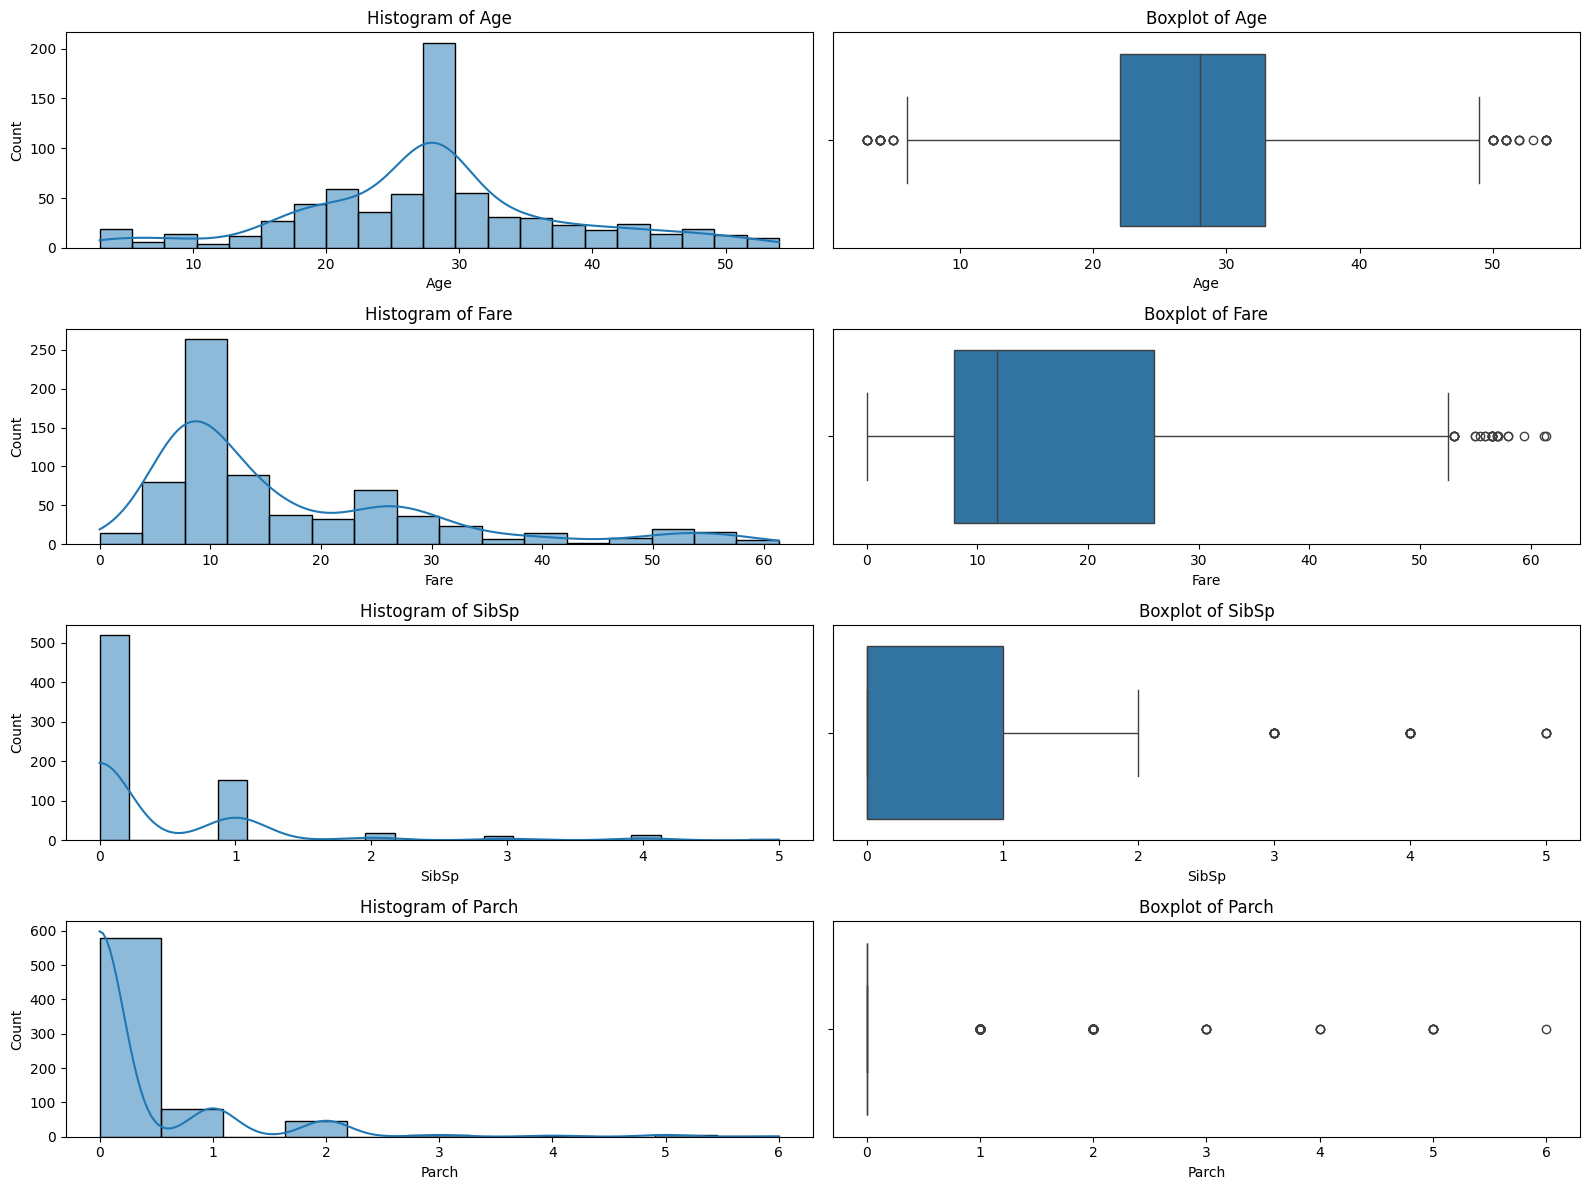

In [10]:
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 2, 2 * i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')

    plt.subplot(4, 2, 2 * i + 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


Pairplot and correlation matrix

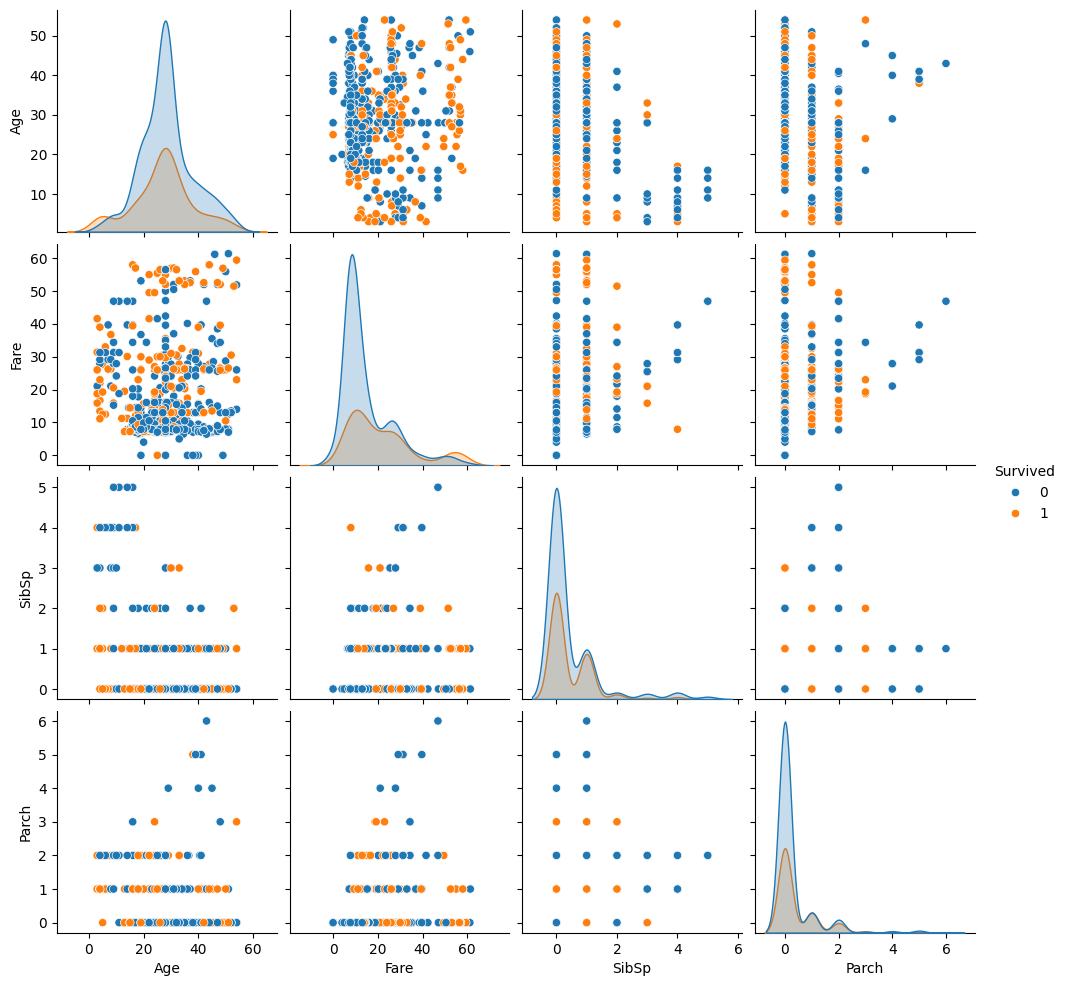

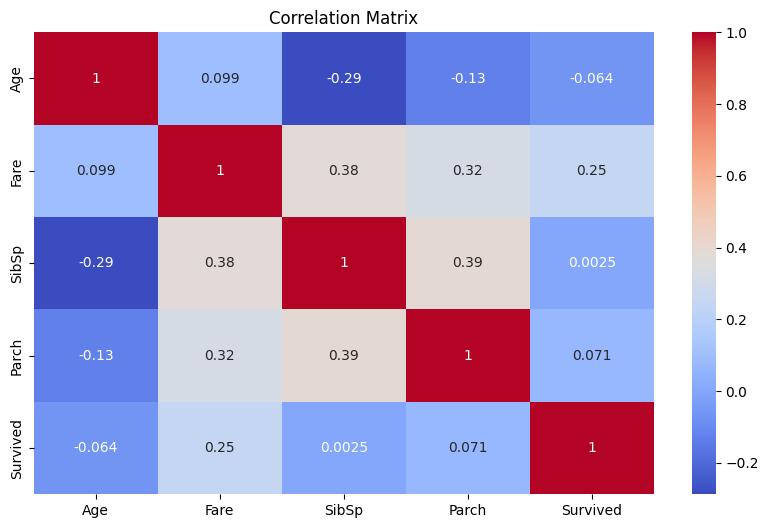

In [11]:
sns.pairplot(df[['Age', 'Fare', 'SibSp', 'Parch', 'Survived']], hue='Survived')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df[['Age', 'Fare', 'SibSp', 'Parch', 'Survived']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()